In [1]:
from sklearn.datasets import load_diabetes

In [2]:
data = load_diabetes()

In [4]:
X = data.data
y = data.target

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
from sklearn.metrics import r2_score , root_mean_squared_error
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred), root_mean_squared_error(y_test, y_pred)

(0.5188113124539249, 48.72713760953253)

In [9]:
from sklearn.linear_model import Ridge
rdg = Ridge(alpha=0.0001)
rdg.fit(X_train , y_train)

,alpha,0.0001
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [10]:
y_pred1 = rdg.predict(X_test)
r2_score(y_test, y_pred1), root_mean_squared_error(y_test, y_pred1)

(0.518973263588495, 48.718937001819555)

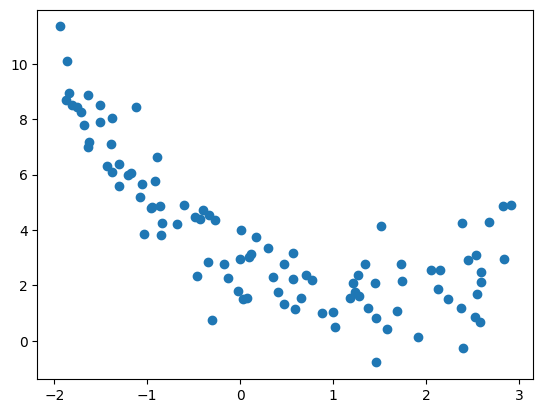

In [11]:
import numpy as np
import matplotlib.pyplot as plt
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

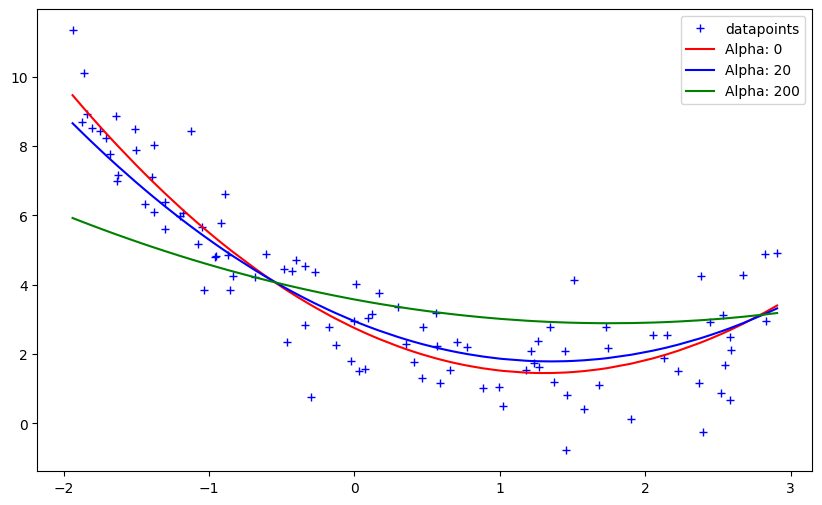

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1,x2,alpha):
    model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                      ('ridge', Ridge(alpha=alpha))])
    model.fit(x1, x2)
    return model.predict(x1)    
alphas = [0,20,200]
cs = ['r','b','g']
plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label="datapoints")

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()